# Front Office Executives in the NFL

Here we are going to try to figure out who are the best GMs in NFL history. Let's start by looking at all of the titles someone in the front office might have.

In [92]:
import sqlite3
import pandas
import seaborn
import numpy

database = sqlite3.connect('../nfldata.sqlite')

In [81]:
query = '''
    SELECT title, COUNT(DISTINCT executive) AS number FROM front_office_members
    GROUP BY title ORDER BY number DESC
'''
front_office_titles = pandas.read_sql_query(query, database)
front_office_titles

,title,number
0,General Manager,158
1,Principal Owner,44
2,Head Coach/General Manager,32
3,Co-Owner,21
4,Head Coach/de facto General Manager,20
...,...,...
122,CEO/Managing Partner,1
123,CEO,1
124,Business General Manager,1
125,Asst. Director of Player Personnel,1


Let's filter, the title a little bit further since we are most interested in those who make the actual roster decisions. We'll use some form of General Manager or VP of Football Operations (held by many de facto GMs such as Howie Roseman).

In [82]:
query = '''
    SELECT title, COUNT(DISTINCT executive) AS number FROM front_office_members
    WHERE LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%'
    GROUP BY title ORDER BY number DESC
'''
front_office_titles = pandas.read_sql_query(query, database)
front_office_titles

,title,number
0,General Manager,158
1,Head Coach/General Manager,32
2,Head Coach/de facto General Manager,20
3,President/General Manager,18
4,Executive VP/General Manager,13
...,...,...
60,Coach/de-facto GM,1
61,Coach/GM,1
62,Co-Owner/President of Football Operations,1
63,Business General Manager,1


Now, let's go ahead and see who some of these GMs are. We'll start by breaking down which executives had the most pro bowlers.

In [83]:
query = '''
    SELECT
        executives.name,
        COUNT(DISTINCT player) AS pro_bowlers
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN roster_members USING (team)
    JOIN players USING (player)
    JOIN teams USING (team)
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
        AND pro_bowl > 0
    GROUP BY executives.executive
    ORDER BY pro_bowlers DESC
'''
general_managers_pro_bowlers = pandas.read_sql_query(query, database)
general_managers_pro_bowlers.head(20)

,name,pro_bowlers
0,Al Davis,79
1,George Halas,72
2,Paul Brown,62
3,Jerry Jones,56
4,Don Klosterman,55
5,Louis Spadia,53
6,Richard Gallagher,48
7,Tex Schramm,45
8,Ray Walsh,44
9,Francis Fogarty,43


Let's take a look at the average number of pro bowlers on GM's roster, and the standard deviation.

In [106]:
numpy.mean(general_managers_pro_bowlers['pro_bowlers'])

13.771653543307087

In [107]:
numpy.std(general_managers_pro_bowlers['pro_bowlers'])

12.77928255498427

<AxesSubplot:xlabel='pro_bowlers', ylabel='Density'>

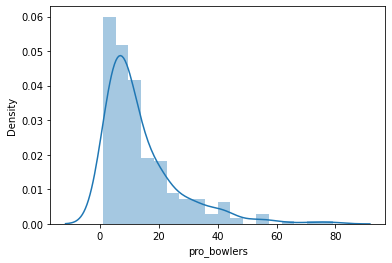

In [91]:
seaborn.distplot(general_managers_pro_bowlers['pro_bowlers'])

There's actually quite a lot of variance in the number of pro-bowlers. What if we normalize over the number of years?

In [104]:
query = '''
    SELECT
        executives.name,
        SUM(pro_bowl) * 1.0 / COUNT(DISTINCT year) AS pro_bowlers_per_year
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN roster_members USING (team)
    JOIN players USING (player)
    JOIN teams USING (team)
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
        AND pro_bowl > 0
    GROUP BY executives.executive
    ORDER BY pro_bowlers_per_year DESC
'''
general_managers_pro_bowlers_per_year = pandas.read_sql_query(query, database)
general_managers_pro_bowlers_per_year.head(20)

,name,pro_bowlers_per_year
0,Richard Gallagher,13.166667
1,Eric DeCosta,13.000000
2,Don Suman,12.000000
3,Pop Ivy,11.000000
4,Ralph Brizzolara,10.000000
5,Jack Espey,9.600000
6,Curly Lambeau,8.800000
7,Jack Steadman,8.666667
8,George Halas,8.444444
9,Mike Holovak,7.583333


In [108]:
numpy.mean(general_managers_pro_bowlers_per_year['pro_bowlers_per_year'])

3.8217039736470535

In [109]:
numpy.std(general_managers_pro_bowlers_per_year['pro_bowlers_per_year'])

1.8970290198704831

<AxesSubplot:xlabel='pro_bowlers_per_year', ylabel='Density'>

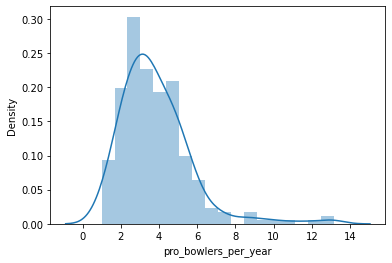

In [110]:
seaborn.distplot(general_managers_pro_bowlers_per_year['pro_bowlers_per_year'])

This data is a bit more normalized, but still a good amount of variance. The top of the list is certainly biased towards early NFL teams when there were far fewer franchises. Now, let's do the same for First Team All Pros.

In [84]:
query = '''
    SELECT
        executives.name,
        COUNT(DISTINCT player) AS first_team_all_pros
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN roster_members USING (team)
    JOIN players USING (player)
    JOIN teams USING (team)
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
        AND first_team_all_pro > 0
    GROUP BY executives.executive
    ORDER BY first_team_all_pros DESC
'''
general_managers_first_team_all_pros = pandas.read_sql_query(query, database)
general_managers_first_team_all_pros.head(20)

,name,first_team_all_pros
0,Al Davis,44
1,Paul Brown,24
2,Tex Schramm,23
3,Vince Lombardi,23
4,Jerry Jones,22
5,Jack Steadman,21
6,George Halas,21
7,Louis Spadia,20
8,Bill Belichick,20
9,Ray Walsh,19


Once again, we see a bias towards older teams. Finally, let's do this calculation for the average approximate value of the roster.

In [85]:
query = '''
    SELECT
        executives.name,
        AVG(DISTINCT approximate_value) AS avg_av
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN roster_members USING (team)
    JOIN players USING (player)
    JOIN teams USING (team)
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
        AND first_team_all_pro > 0
        AND year >= 1970
    GROUP BY executives.executive
    ORDER BY avg_av DESC
'''
general_managers_average_approximate_value = pandas.read_sql_query(query, database)
general_managers_average_approximate_value.head(20)

,name,avg_av
0,Dick Vermeil,20.500000
1,Harold Richardson,19.000000
2,Scot McCloughan,19.000000
3,Vince Lombardi,19.000000
4,Jay Zygmunt,18.800000
5,Charley Armey,18.800000
6,Ray Walsh,18.000000
7,Bart Starr,18.000000
8,Carmen Policy,18.000000
9,Fran Foley,18.000000


Here we had to restrict our analysis to just the GMs after 1970, because Pro Football Reference does not have approximate value data for all players before that season.

## The Draft

One of the biggest keys to success for a GM is the ability to nail the draft. When you can nail the nail the draft, you can have sustained success for a long period of time. Let's start by taking a look at the GMs who drafted the most pro bowlers. We will only count the ones that made the pro bowl for the team that drafted them. Again, we expect that there will be a bias towards some of the older teams, when there were fewer franchises.

In [86]:
query = '''
    SELECT
        executives.name,
        COUNT(DISTINCT draft_picks.player) AS pro_bowlers_drafted
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN teams USING (team)
    JOIN draft_picks USING (franchise, year)
    JOIN roster_members ON (draft_picks.player = roster_members.player AND roster_members.team LIKE (teams.franchise || '%'))
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
        AND pro_bowl > 0
    GROUP BY executives.executive
    ORDER BY pro_bowlers_drafted DESC
'''
general_managers_drafted_pro_bowlers = pandas.read_sql_query(query, database)
general_managers_drafted_pro_bowlers.head(20)

,name,pro_bowlers_drafted
0,George Halas,48
1,Paul Brown,41
2,Jerry Jones,36
3,Louis Spadia,36
4,Al Davis,32
5,Tex Schramm,27
6,Don Klosterman,26
7,Bill Bidwill,25
8,Ozzie Newsome,25
9,Jim Finks,24


Let's also take a look at the most first team all pros drafted.

In [87]:
query = '''
    SELECT
        executives.name,
        COUNT(DISTINCT draft_picks.player) AS first_team_all_pros_drafted
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN teams USING (team)
    JOIN draft_picks USING (franchise, year)
    JOIN roster_members ON (draft_picks.player = roster_members.player AND roster_members.team LIKE (teams.franchise || '%'))
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
        AND first_team_all_pro > 0
    GROUP BY executives.executive
    ORDER BY first_team_all_pros_drafted DESC
'''
general_managers_drafted_first_team_all_pros = pandas.read_sql_query(query, database)
general_managers_drafted_first_team_all_pros.head(30)

,name,first_team_all_pros_drafted
0,George Halas,18
1,Al Davis,17
2,Paul Brown,16
3,Jerry Jones,15
4,Ozzie Newsome,14
5,Tex Schramm,14
6,Louis Spadia,14
7,Jim Finks,11
8,Dick Haley,11
9,Don Kellett,11


## Free Agency

Similarly, GMs who struggle with the draft can sometimes compensate for their team's weaknesses using free agency. Let's see if we can identify who are the best GMs in terms of free agent signings.

## Howie Roseman: A Case Study

Now, let's do an analysis of Howie Roseman, de factor GM of the Eagles. Let's take a quick look at his tenure:

In [88]:
query = '''
    SELECT executives.name, title, franchise, year 
    FROM executives 
    JOIN front_office_members USING (executive)
    JOIN teams USING (team)
    WHERE executives.name = 'Howie Roseman';
'''
howie_tenure = pandas.read_sql_query(query, database)
howie_tenure

,name,title,franchise,year
0,Howie Roseman,General Manager,/teams/phi,2010
1,Howie Roseman,General Manager,/teams/phi,2011
2,Howie Roseman,General Manager,/teams/phi,2012
3,Howie Roseman,General Manager,/teams/phi,2013
4,Howie Roseman,General Manager,/teams/phi,2014
5,Howie Roseman,Exec. VP of Football Ops,/teams/phi,2015
6,Howie Roseman,Exec. VP of Football Ops,/teams/phi,2016
7,Howie Roseman,Exec. VP of Football Ops,/teams/phi,2017
8,Howie Roseman,Exec. VP of Football Ops,/teams/phi,2018
9,Howie Roseman,Exec. VP of Football Ops,/teams/phi,2019


He has held a front office position with the Eagles for the last 11 years. His tenure is often regarded as controversial due to how long it has gone on, and how many head coaches he has worked with over that time. With the hiring of Nick Sirianni, it will be his fourth head coach. Just to give you a look at how unusual that is:

In [89]:
query = '''
    SELECT executives.name, title, MIN(year) AS first_year, MAX(year) AS last_year, COUNT(DISTINCT coaches.coach) AS number_of_coaches, COUNT(DISTINCT coaches.coach) * 1.0 / (MAX(year) - MIN(year) + 1) AS coaches_per_year
    FROM executives
    JOIN front_office_members USING (executive)
    JOIN teams USING (team)
    JOIN coaching_staff_members USING (team)
    JOIN coaches USING (coach)
    WHERE (LOWER(title) LIKE '%general manager%'
        OR LOWER(title) LIKE '%gm%'
        OR LOWER(title) LIKE '%football ops%'
        OR LOWER(title) LIKE '%football operations%')
    AND title NOT LIKE '%owner%'
    AND title NOT LIKE '%coach%'
    GROUP BY executives.executive
    ORDER BY coaches_per_year DESC
'''
gms_and_coaches = pandas.read_sql_query(query, database)
gms_and_coaches

,name,title,first_year,last_year,number_of_coaches,coaches_per_year
0,Brian Xanders,General Manager,2009,2011,3,1.000000
1,Sheldon White,Interim GM,2015,2015,1,1.000000
2,Al Ward,General Manager,1975,1976,2,1.000000
3,Jack Teele,General Manager,1970,1970,1,1.000000
4,Dennis Shea,General Manager,1942,1943,2,1.000000
...,...,...,...,...,...,...
210,John Schneider,Executive VP/General Manager,2010,2020,1,0.090909
211,Mike Robbie,General Manager,1978,1989,1,0.083333
212,Floyd Reese,General Manager/Executive VP of Football Opera...,1994,2006,1,0.076923
213,Dick Haley,General Manager,1971,2002,2,0.062500
